# IBM Introduction to Machine Learning
## Exploratory Data Analysis for Machine Learning¶
### Course Project

In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [3]:
filepath = "caschool.xlsx"
data = pd.read_excel(filepath)
data.head().T

,0,1,2,3,4
Observation Number,1,2,3,4,5
dist_cod,75119,61499,61549,61457,61523
county,Alameda,Butte,Butte,Butte,Butte
district,Sunol Glen Unified,Manzanita Elementary,Thermalito Union Elementary,Golden Feather Union Elementary,Palermo Union Elementary
gr_span,KK-08,KK-08,KK-08,KK-08,KK-08
enrl_tot,195,240,1550,243,1335
teachers,10.9,11.15,82.9,14,71.5
calw_pct,0.5102,15.4167,55.0323,36.4754,33.1086
meal_pct,2.0408,47.9167,76.3226,77.0492,78.427
computer,67,101,169,85,171


In [4]:
data.shape

(420, 18)

In [5]:
# data.county.value_counts()
data.county.nunique()

45

In [6]:
data.columns.tolist()

['Observation Number',
 'dist_cod',
 'county',
 'district',
 'gr_span',
 'enrl_tot',
 'teachers',
 'calw_pct',
 'meal_pct',
 'computer',
 'testscr',
 'comp_stu',
 'expn_stu',
 'str',
 'avginc',
 'el_pct',
 'read_scr',
 'math_scr']

In [7]:
data.dtypes

Observation Number      int64
dist_cod                int64
county                 object
district               object
gr_span                object
enrl_tot                int64
teachers              float64
calw_pct              float64
meal_pct              float64
computer                int64
testscr               float64
comp_stu              float64
expn_stu              float64
str                   float64
avginc                float64
el_pct                float64
read_scr              float64
math_scr              float64
dtype: object

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Observation Number,420.0,210.500000,121.387808,1.000000,105.750000,210.500000,315.250000,420.000000
dist_cod,420.0,67472.809524,3466.994655,61382.000000,64307.750000,67760.500000,70419.000000,75440.000000
enrl_tot,420.0,2628.792857,3913.104985,81.000000,379.000000,950.500000,3008.000000,27176.000000
teachers,420.0,129.067376,187.912679,4.850000,19.662499,48.564999,146.350002,1429.000000
calw_pct,420.0,13.246042,11.454821,0.000000,4.395375,10.520450,18.981350,78.994202
meal_pct,420.0,44.705237,27.123381,0.000000,23.282200,41.750700,66.864725,100.000000
computer,420.0,303.383333,441.341298,0.000000,46.000000,117.500000,375.250000,3324.000000
testscr,420.0,654.156548,19.053348,605.550049,640.049988,654.449982,666.662506,706.750000
comp_stu,420.0,0.135927,0.064956,0.000000,0.093767,0.125464,0.164466,0.420833
expn_stu,420.0,5312.407541,633.937053,3926.069580,4906.180054,5214.516602,5601.401367,7711.506836


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
from sklearn.linear_model import LinearRegression
import numpy as np

x = np.array(data["str"]).reshape(-1, 1)
y = np.array(data["testscr"])

lr = LinearRegression()
lr.fit(x, y)

print(lr.intercept_)
print(lr.coef_)

698.9329523279787
[-2.27980829]


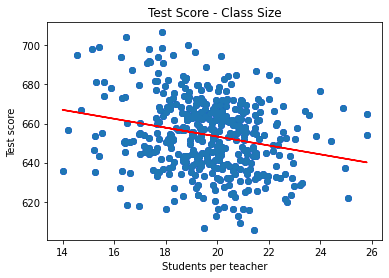

In [11]:
ax = plt.axes()

ax.scatter(data.str, data.testscr, color= 'blue')

ax.set(xlabel='Students per teacher',
       ylabel='Test score',
       title='Test Score - Class Size');

Y_pred = lr.predict(x)
plt.scatter(x, y)
plt.plot(x, Y_pred, color= 'red')
plt.show()

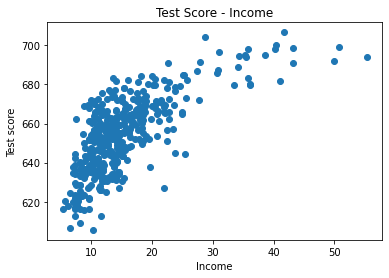

In [12]:
ax = plt.axes()

ax.scatter(data.avginc, data.testscr)

ax.set(xlabel='Income',
       ylabel='Test score',
       title='Test Score - Income');

In [13]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [14]:
import seaborn as sns

In [15]:
# pd.set_option('display.max_columns', None)
data3 = data

In [16]:
data3 = data3.drop(columns=['Observation Number', 'dist_cod', 'county', 'district', 'gr_span', 'teachers', 'computer',])

In [17]:
data3.corr()

,enrl_tot,calw_pct,meal_pct,testscr,comp_stu,expn_stu,str,avginc,el_pct,read_scr,math_scr
enrl_tot,1.000000,0.090161,0.129234,-0.153988,-0.212718,-0.112285,0.298481,0.028392,0.354879,-0.188399,-0.110889
calw_pct,0.090161,1.000000,0.739422,-0.626853,-0.151968,0.067889,0.018276,-0.512651,0.319576,-0.611847,-0.617691
meal_pct,0.129234,0.739422,1.000000,-0.868772,-0.203953,-0.061039,0.135203,-0.684440,0.653061,-0.878808,-0.823015
testscr,-0.153988,-0.626853,-0.868772,1.000000,0.270703,0.191273,-0.226363,0.712431,-0.644124,0.981882,0.979143
comp_stu,-0.212718,-0.151968,-0.203953,0.270703,1.000000,0.286560,-0.307070,0.194806,-0.251007,0.281158,0.248589
expn_stu,-0.112285,0.067889,-0.061039,0.191273,0.286560,1.000000,-0.619982,0.314484,-0.071396,0.217927,0.154989
str,0.298481,0.018276,0.135203,-0.226363,-0.307070,-0.619982,1.000000,-0.232194,0.187642,-0.246593,-0.195553
avginc,0.028392,-0.512651,-0.684440,0.712431,0.194806,0.314484,-0.232194,1.000000,-0.307419,0.697819,0.699398
el_pct,0.354879,0.319576,0.653061,-0.644124,-0.251007,-0.071396,0.187642,-0.307419,1.000000,-0.690286,-0.568682
read_scr,-0.188399,-0.611847,-0.878808,0.981882,0.281158,0.217927,-0.246593,0.697819,-0.690286,1.000000,0.922901


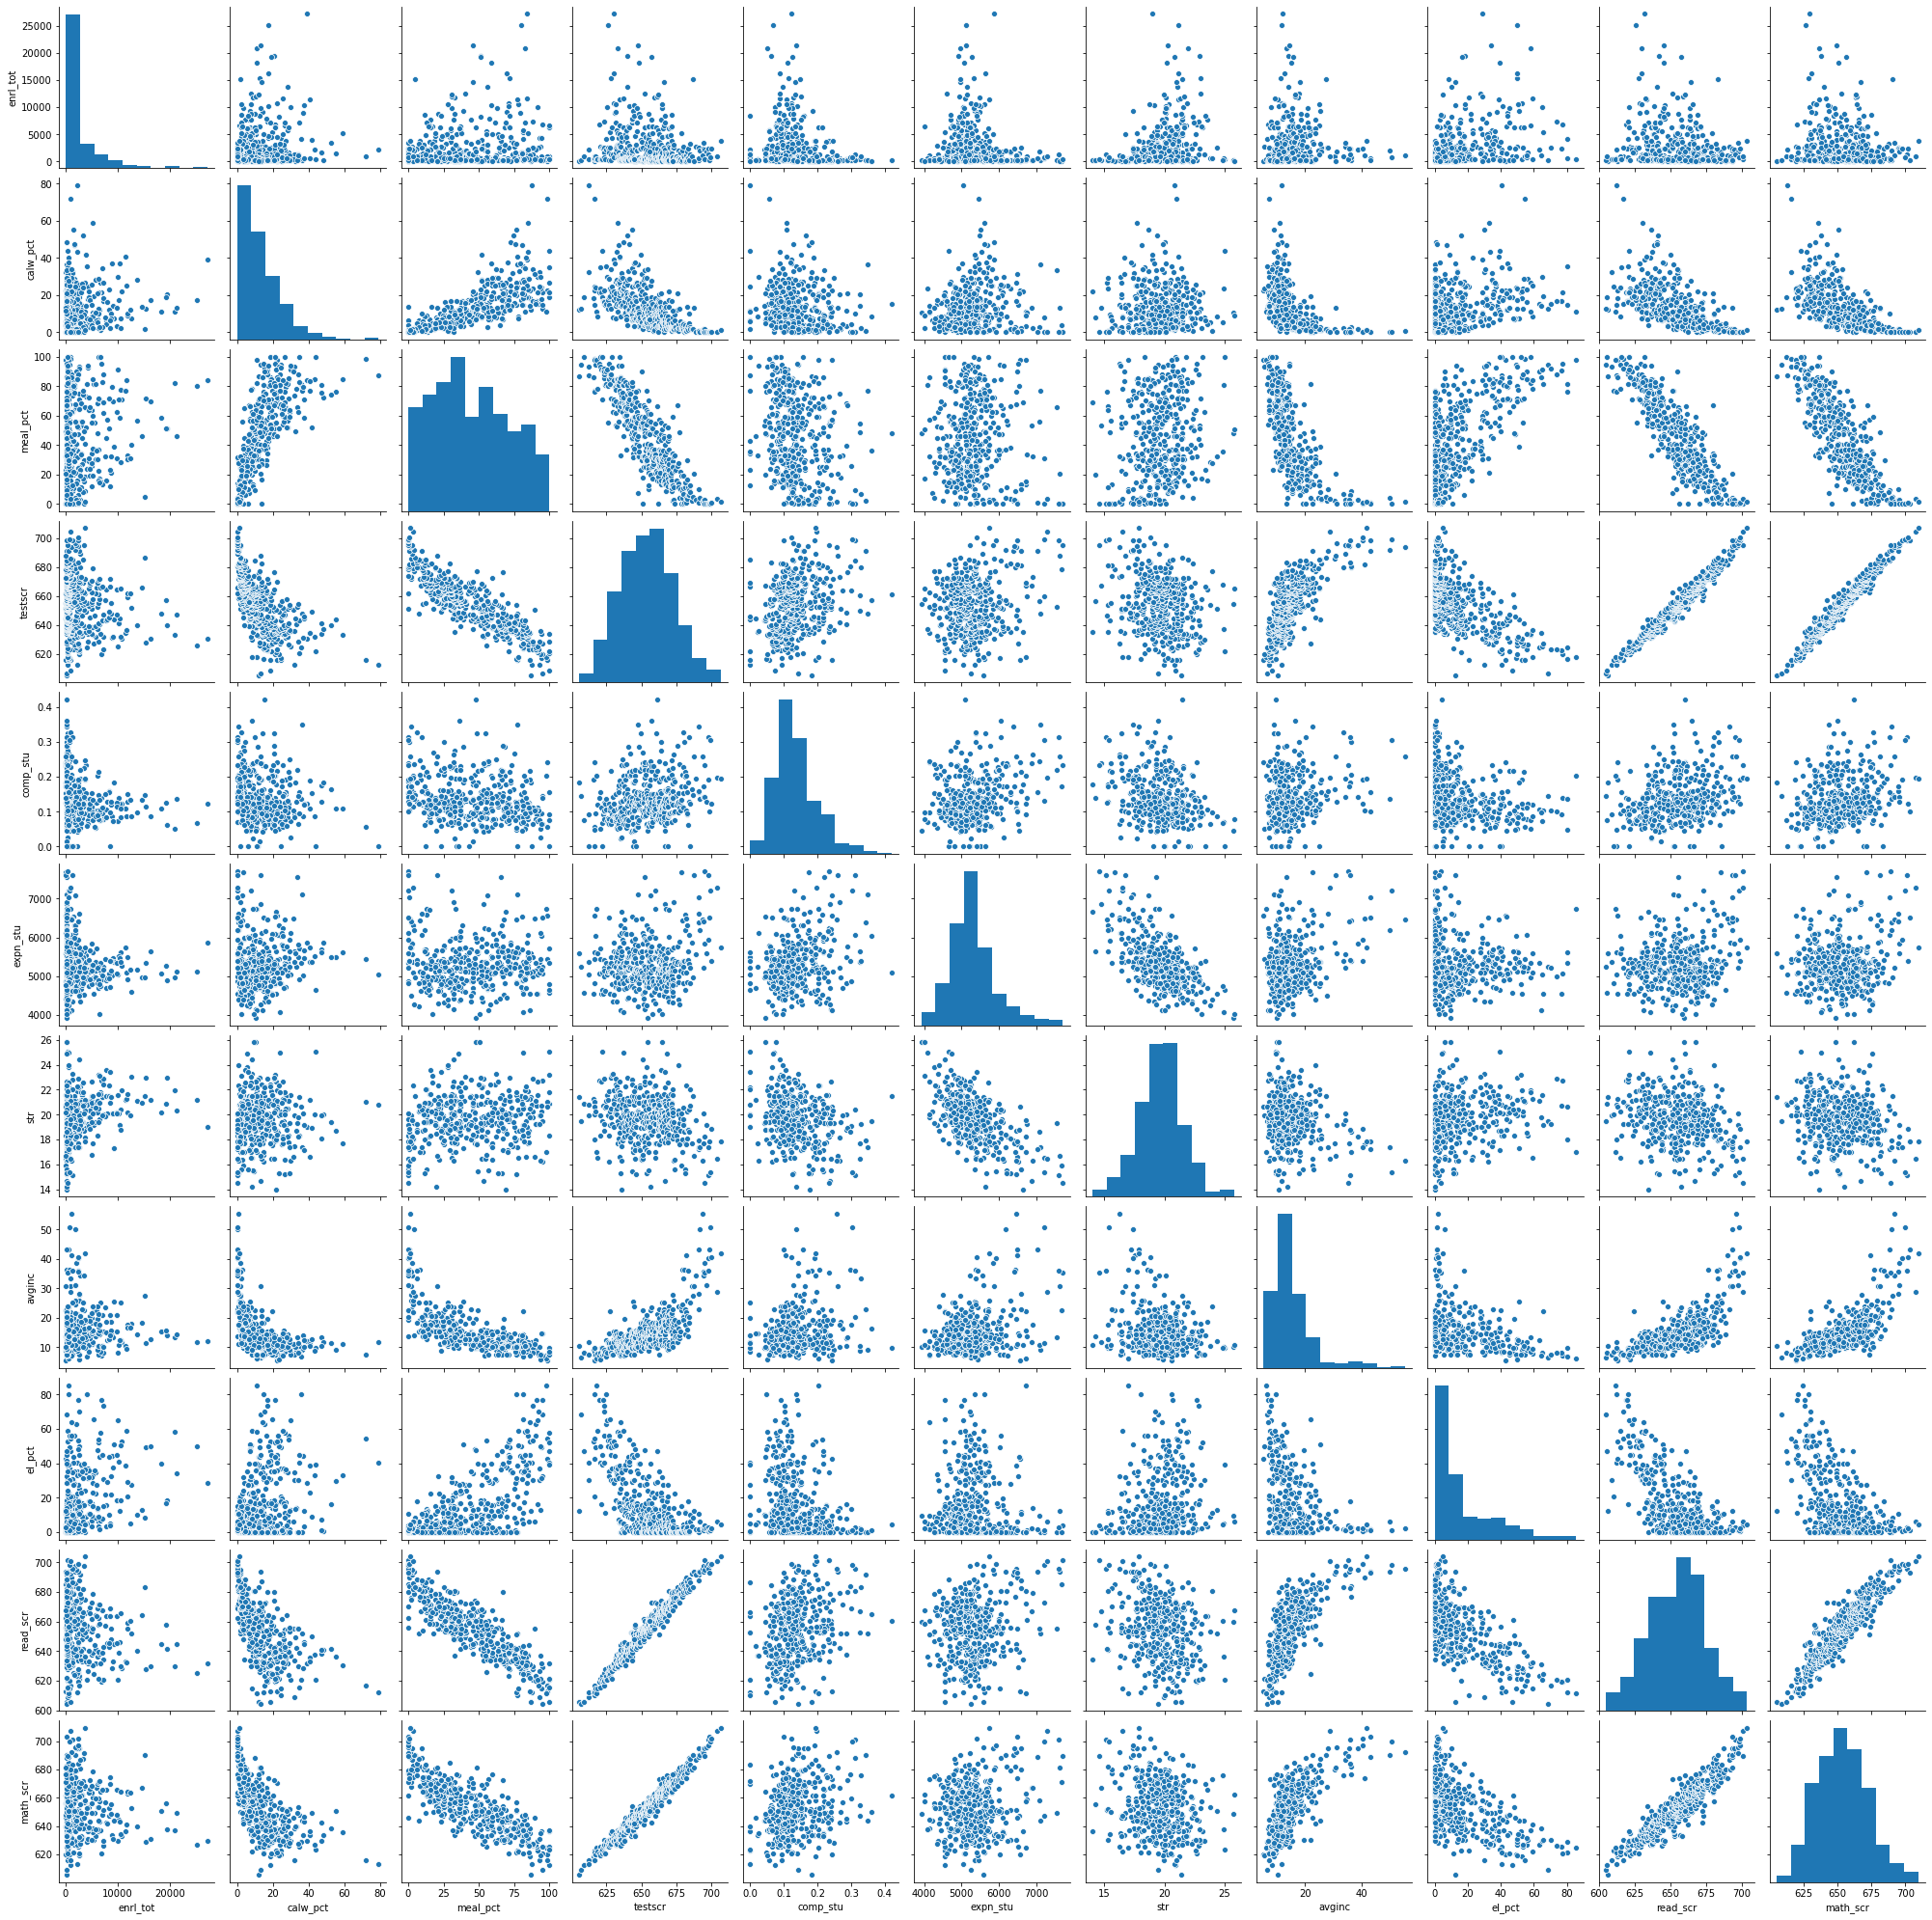

In [18]:
sns.pairplot(data3)

In [19]:
one_hot_encode_cols = data.dtypes[data.dtypes == np.object]
one_hot_encode_cols = one_hot_encode_cols.index.tolist()

data[one_hot_encode_cols].head().T

,0,1,2,3,4
county,Alameda,Butte,Butte,Butte,Butte
district,Sunol Glen Unified,Manzanita Elementary,Thermalito Union Elementary,Golden Feather Union Elementary,Palermo Union Elementary
gr_span,KK-08,KK-08,KK-08,KK-08,KK-08


In [20]:
data2 = data.copy()

In [21]:
mask = data2.dtypes == np.float
float_cols = data2.columns[mask]

skew_limit = 0.75
skew_vals = data2[float_cols].skew()

In [22]:
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

skew_cols

,Skew
teachers,2.943065
avginc,2.223104
calw_pct,1.689099
el_pct,1.431917
expn_stu,1.071729
comp_stu,0.925678


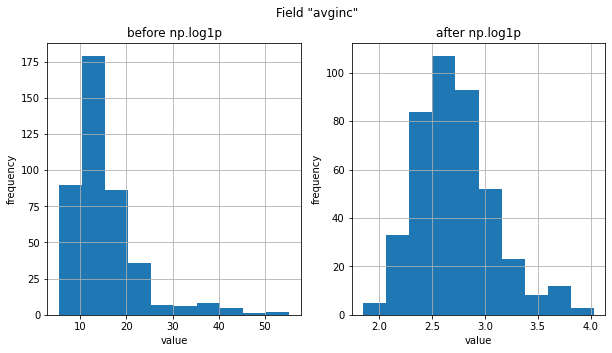

In [23]:
field = "avginc"

# Create two "subplots" and a "figure" using matplotlib
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))

# Create a histogram on the "ax_before" subplot
data[field].hist(ax=ax_before)

# Apply a log transformation (numpy syntax) to this column
data[field].apply(np.log1p).hist(ax=ax_after)

# Formatting of titles etc. for each subplot
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field));

In [24]:
# Perform the skew transformation:

for col in skew_cols.index.values:
    if col == "str":
        continue
    data[col] = data[col].apply(np.log1p)

In [25]:
data.shape

(420, 18)

In [26]:
#ax = plt.axes()

#ax.scatter(data.avginc, data.testscr)

#ax.set(xlabel='Income',
#       ylabel='Test score',
#       title='Test Score - Income');

In [27]:
from sklearn.preprocessing import PolynomialFeatures

In [28]:
pf = PolynomialFeatures(degree=2)
features = ['avginc']
pf.fit(data[features])

PolynomialFeatures()

In [29]:
pf.get_feature_names()

['1', 'x0', 'x0^2']

In [30]:
feat_array = pf.transform(data[features])
pd.DataFrame(feat_array, columns = pf.get_feature_names(input_features=features))

,1,avginc,avginc^2
0,1.0,3.165053,10.017561
1,1.0,2.381766,5.672809
2,1.0,2.300383,5.291760
3,1.0,2.300383,5.291760
4,1.0,2.310586,5.338809
...,...,...,...
415,1.0,3.391719,11.503759
416,1.0,3.754997,14.100005
417,1.0,3.208138,10.292152
418,1.0,2.393522,5.728948
